In [8]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../../python")
from model_report import ADMReport, ModelReport
from cdh_utils import readDSExport

In [9]:
df1 = readDSExport("Data-Decision-ADM-ModelSnapshot_pyModelSnapshots", srcFolder="../example_reports_dmsample")
df2 = readDSExport("Data-Decision-ADM-PredictorBinningSnapshot_pyADMPredictorSnapshots", srcFolder="../example_reports_dmsample")

Data-Decision-ADM-ModelSnapshot_pyModelSnapshots_20191120T113357_GMT.zip
Data-Decision-ADM-PredictorBinningSnapshot_pyADMPredictorSnapshots_20191120T113436_GMT.zip


In [10]:
df1['pySnapshotTime'] = pd.to_datetime(df1['pySnapshotTime'])

In [11]:
df1.head(3)

,pyAppliesToClass,pySnapshotTime,pyModelID,pxInsName,pxSaveDateTime,pyRelativePositives,pyNegatives,pyRelativeResponseCount,pyActivePredictors,pyPositives,...,pyConfigurationName,pyPerformanceError,pyResponseCount,pyRelativeNegatives,pyName,pxCommitDateTime,pyChannel,pyDirection,pyGroup,pyIssue
0,DMOrg-DMSample-Work-MortgageRequest,2019-05-27 13:37:13.618000+00:00,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0036C6B6-B9EA-512D-9ED7-FA21274B284C!20190527T...,20190527T133713.628 GMT,0,63,0,7,187,...,Adm_1559077670,0.0017,250,0,"{""pyStageName"":""LoanClosing""}",20190527T133713.651 GMT,NaN,NaN,NaN,NaN
1,DMOrg-DMSample-Work-MortgageRequest,2019-05-27 13:37:23.202000+00:00,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0036C6B6-B9EA-512D-9ED7-FA21274B284C!20190527T...,20190527T133742.792 GMT,0,63,0,7,187,...,Adm_1559077670,0.0017,250,0,"{""pyStageName"":""LoanClosing""}",20190527T133742.815 GMT,NaN,NaN,NaN,NaN
2,DMOrg-DMSample-Work-MortgageRequest,2019-05-28 05:25:04.579000+00:00,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0036C6B6-B9EA-512D-9ED7-FA21274B284C!20190528T...,20190528T052522.522 GMT,0,63,0,5,187,...,Adm_1559077670,0.0017,250,0,"{""pyStageName"":""LoanClosing""}",20190528T052522.542 GMT,NaN,NaN,NaN,NaN


In [12]:
df2.head(3)

,pyBinResponseCountPercentage,pyContents,pyZRatio,pyModelID,pyRelativePositives,pyBinType,pyRelativeResponseCount,pyBinSymbol,pyPredictorName,pyBinPositivesPercentage,...,pyNegatives,pyPositives,pyEntryType,pyGroupIndex,pzInsKey,pyBinPositives,pyRelativeBinNegatives,pyRelativeNegatives,pyBinResponseCount,pxCommitDateTime
0,6.8,"Range : [-0.42, 3.0]",-0.892738,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0,EQUIBEHAVIOR,0,<0.0,Classifier,5.88,...,63,187,Classifier,0,DATA-DECISION-ADM-PREDICTORBINNINGSNAPSHOT 003...,11,0,0,17,20190527T133713.651 GMT
1,10.4,"Range : [-0.42, 3.0]",-1.063584,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0,EQUIBEHAVIOR,0,"[0.0, 0.12>",Classifier,9.09,...,63,187,Classifier,0,DATA-DECISION-ADM-PREDICTORBINNINGSNAPSHOT 003...,17,0,0,26,20190527T133713.651 GMT
2,40.4,"Range : [-0.42, 3.0]",-1.335967,0036c6b6-b9ea-512d-9ed7-fa21274b284c,0,EQUIBEHAVIOR,0,"[0.12, 0.53>",Classifier,37.97,...,63,187,Classifier,0,DATA-DECISION-ADM-PREDICTORBINNINGSNAPSHOT 003...,71,0,0,101,20190527T133713.651 GMT


Create a ModelReport class instance called Models. To instantiate the class, use the parameters listed in the example below. Different reports, depending on how they are extracted, might have different column names. The class instance ensures that any file regardless of column name can be used.

In [13]:
Models = ModelReport(np.array(df1['pyModelID']), np.array(df1['pyIssue']), np.array(df1['pyGroup']), 
                     np.array(df1['pyChannel']), np.array(df1['pyDirection']), np.array(df1['pyName']), 
                     np.array(df1['pyPositives']), np.array(df1['pyResponseCount']), 
                     np.array(df1['pyPerformance']), np.array(df1['pySnapshotTime']))

## Graph that shows the success rate of the latest model snapshot per model

Since there are many models, figsize parameter has been used to modify the figure size

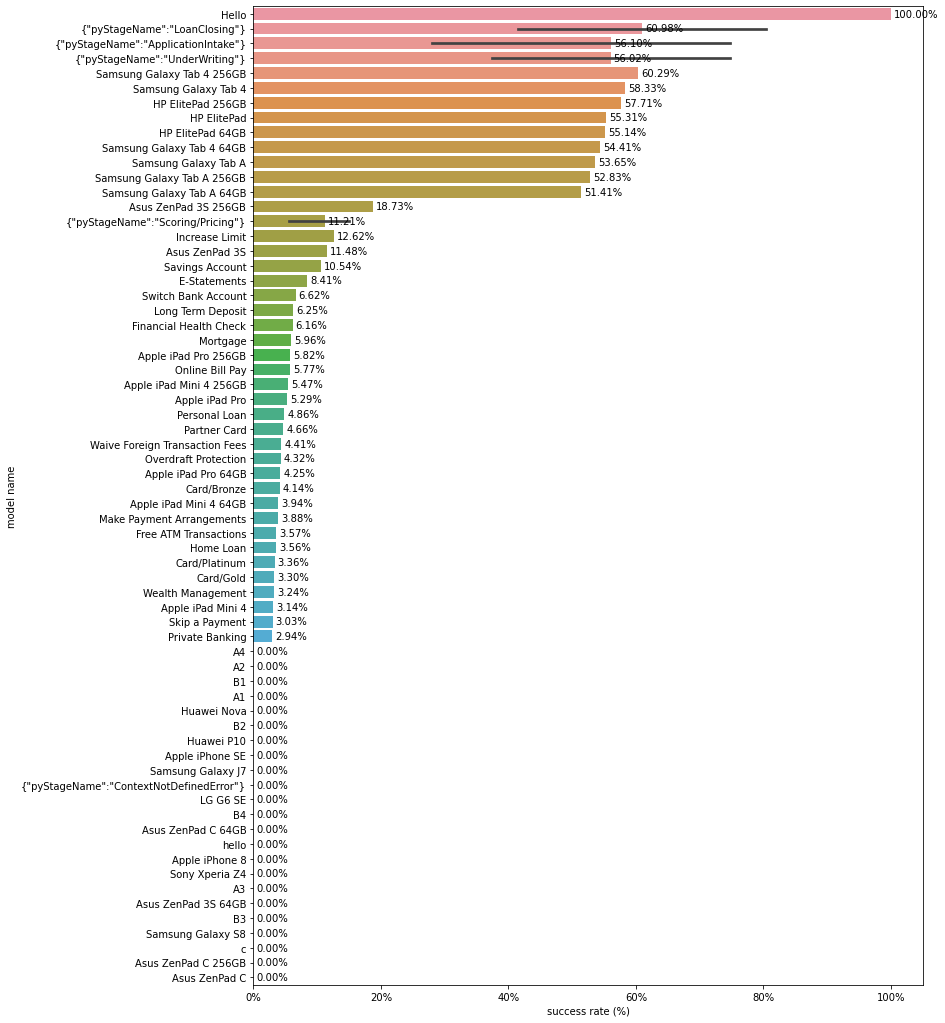

In [14]:
Models.show_success_rate(figsize=(12, 18))

In the above graph it is possible to show certain models instead of all models. query parameter is a dict type used for customization/filtering. The keys of the dict are properties that need to be customized/filtered. The value is of list type used as valid values for the corresponding key. In the following graph, query parameter is used to set 'model name' to those model names within Service group.

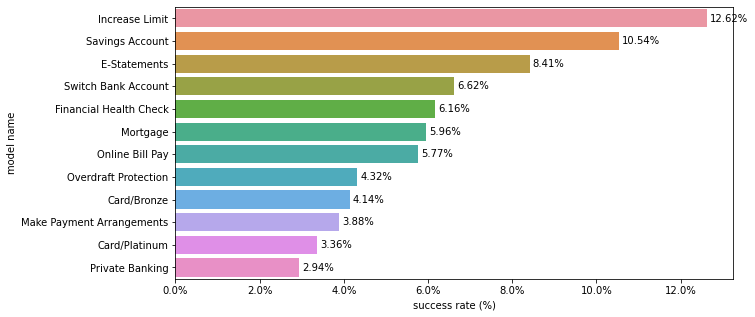

In [15]:
Models.show_success_rate(query={'model name':list(df1[df1['pyGroup']=='Service']['pyName'].unique())}, figsize=(10, 5))

As another example, it is possible to only look into models within a certain channel (this could be other dimensions too like issue or group etc.)

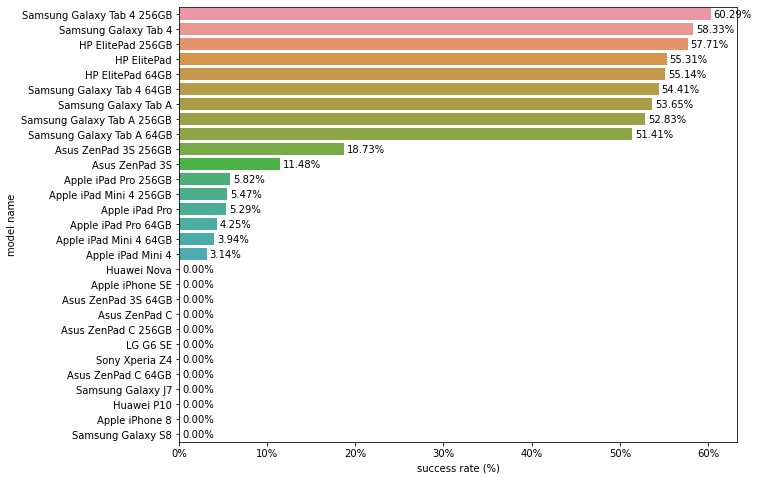

In [16]:
Models.show_success_rate(query={'channel':['Call Center']}, figsize=(10, 8))

## Graph that shows response and AUC over time

Use query parameter to customize the graph. The following graph focuses on the offers within Sales issue.

Maximum AUC across all models: 0.94


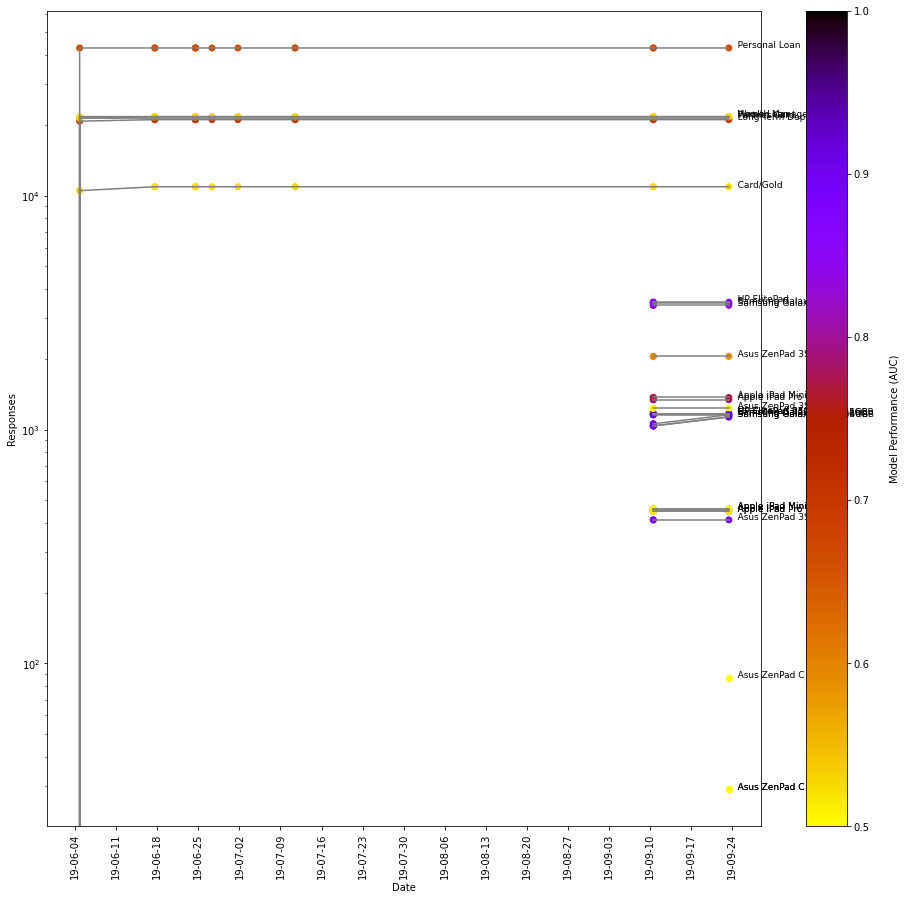

In [17]:
Models.show_response_auc_time(query={'issue':['Sales']}, figsize=(16, 15))

## Bubble chart

The following graph shows the bubble chart as shown on the Pega out-of-the-box model report landing page. Again, since the models are too many, it can be customized to focus on certain models of interest.

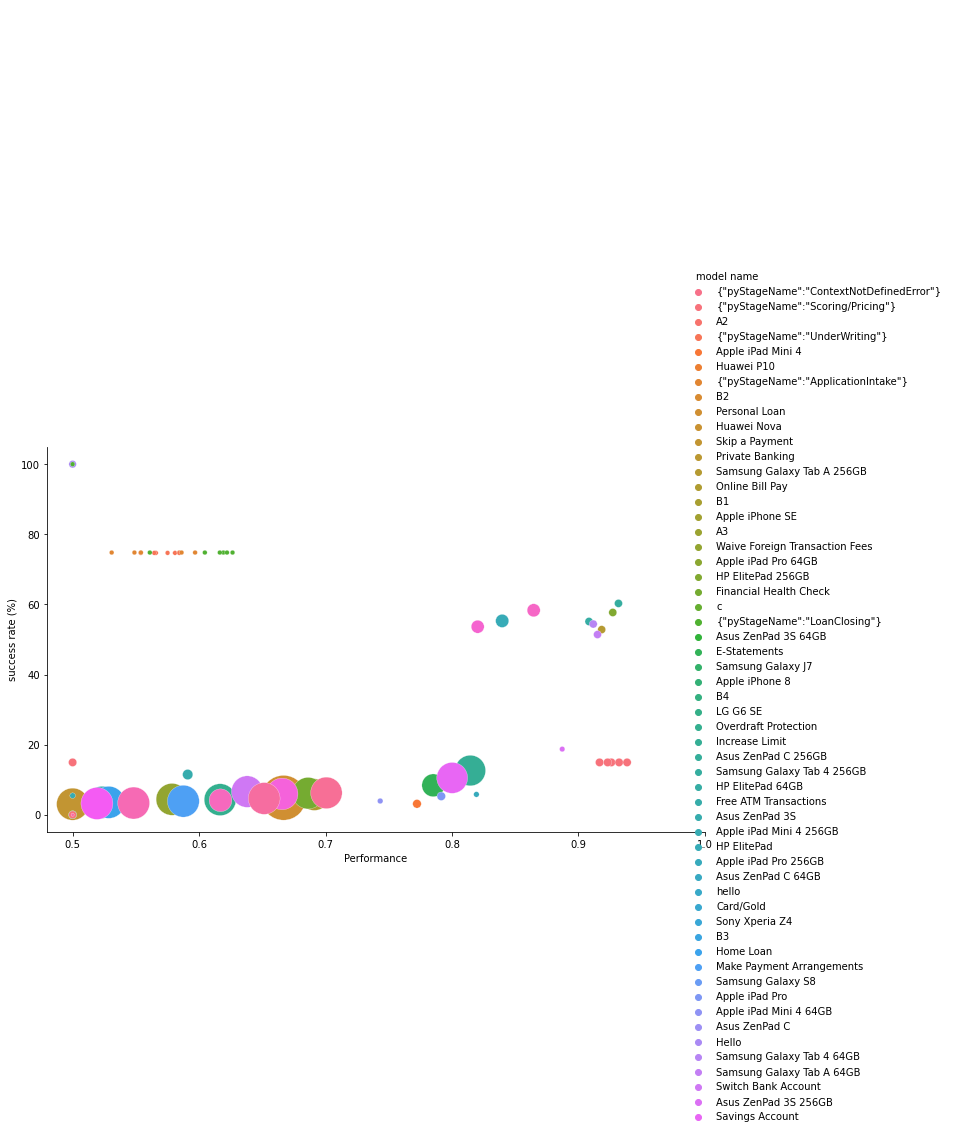

In [18]:
Models.show_bubble_chart()

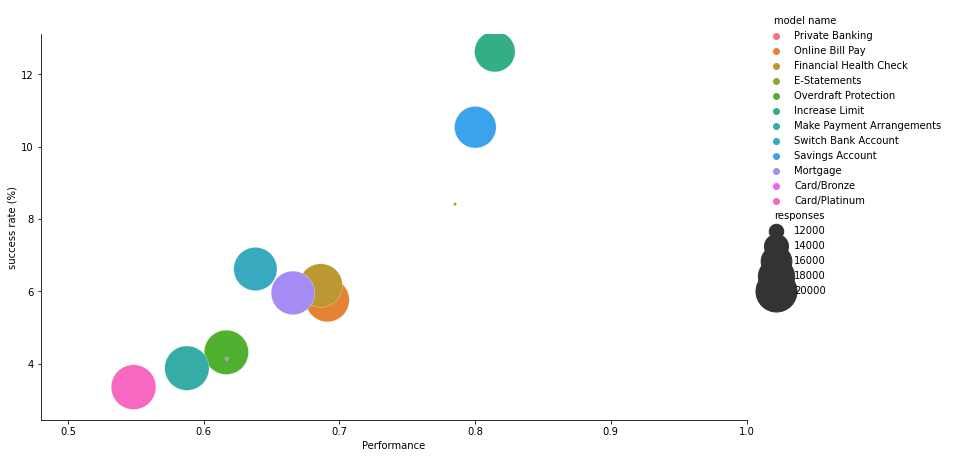

In [19]:
Models.show_bubble_chart(query={'issue':['Service']})

The below graph provides a calendar view of responses collected per offer over time. Each cell has the number of the responses per day. The color of each cell represent the change of responses compared to the previous day. If responses in a certain day increase compared to the previous timestamp, the cell will be white, if the responses do not change, then it will be shown by orange color. If this situation occurs very frequently for a certain model, or if it continues over time, the model might need attention to understand why it is not being offered. Lastly, if the responses decrease, that will be labeled by red. This should not happen at all.

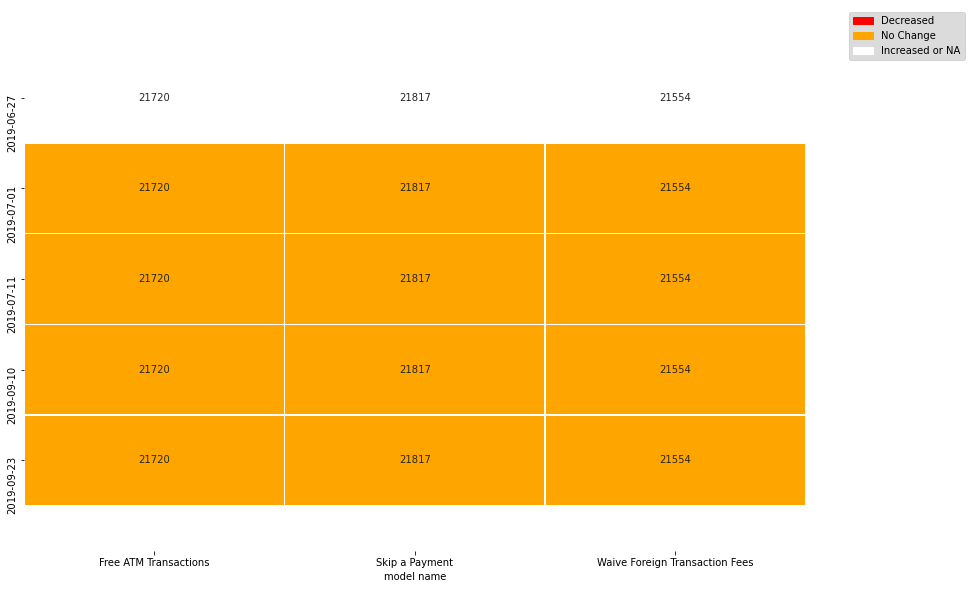

In [20]:
Models.show_calendar_heatmap(query={'issue':['Retention']}, fill_null_days=False, lookback=90)

# Explore Predictor Report

First instantiate the preditor class. Use the following code as an example:

In [21]:
Preds = ADMReport(Models.modelID, Models.issue, Models.group, Models.channel, Models.direction, 
                  Models.modelName, Models.positives, Models.responses, Models.modelAUC, 
                  Models.modelSnapshot, np.array(df2['pyModelID']), np.array(df2['pyPredictorName']), 
                  np.array(df2['pyPerformance']), np.array(df2['pyBinSymbol']), 
                  np.array(df2['pyBinIndex']), np.array(df2['pyEntryType']), 
                  np.array(df2['pyType']), np.array(df2['pySnapshotTime']), 
                  np.array(df2['pyBinPositives']), np.array(df2['pyBinResponseCount']))

## Showing score distributions within Retention issue

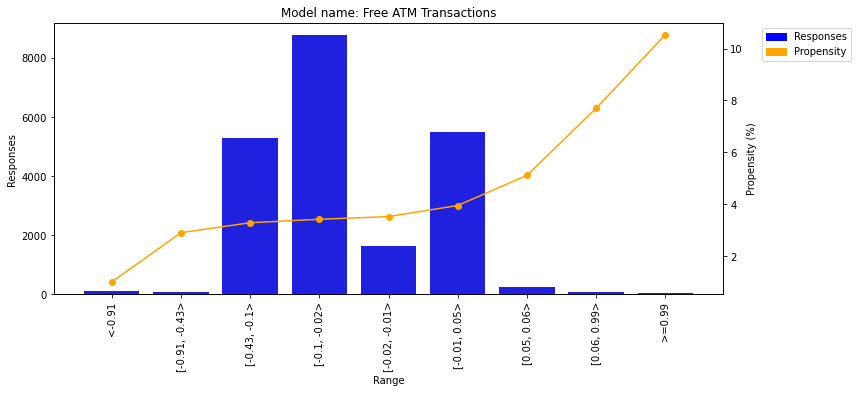

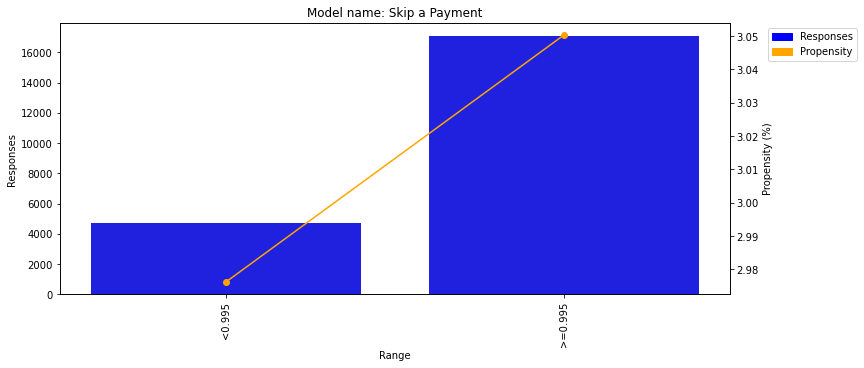

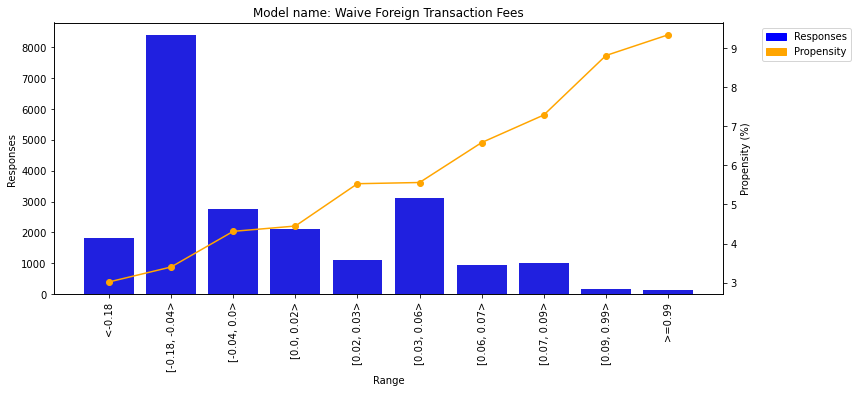

In [22]:
Preds.show_score_distribution(query={'issue':['Retention']}, figsize=(12,5))

## Showing predictor report for active predictors within 'Partner Card' model

The model has numerous active predictors. Here we show the predictor graphs for a selection of predictors.

Model ID: ['286cf410-e064-52e6-a9a4-41b86a9df919']


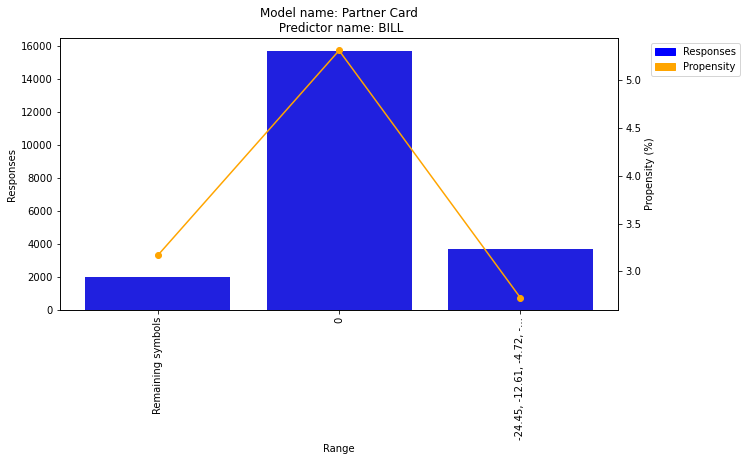

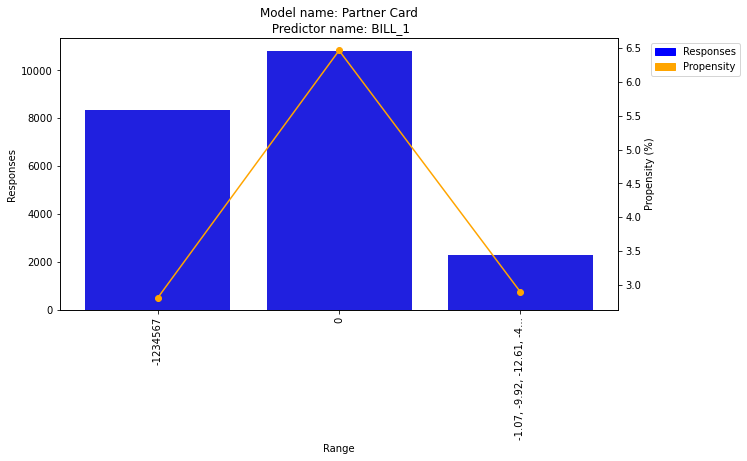

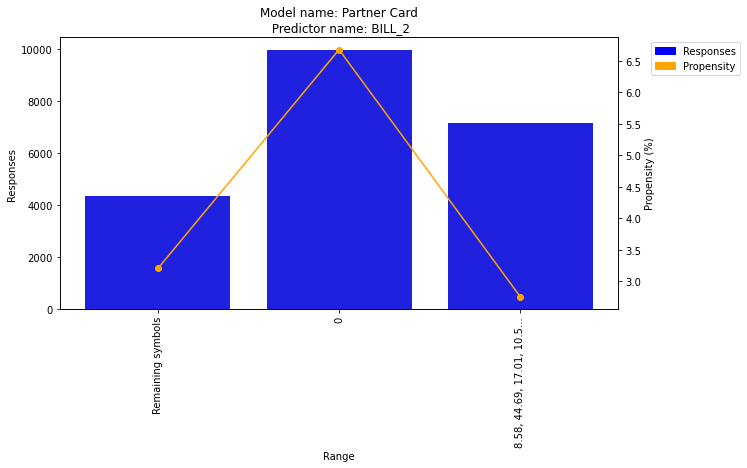

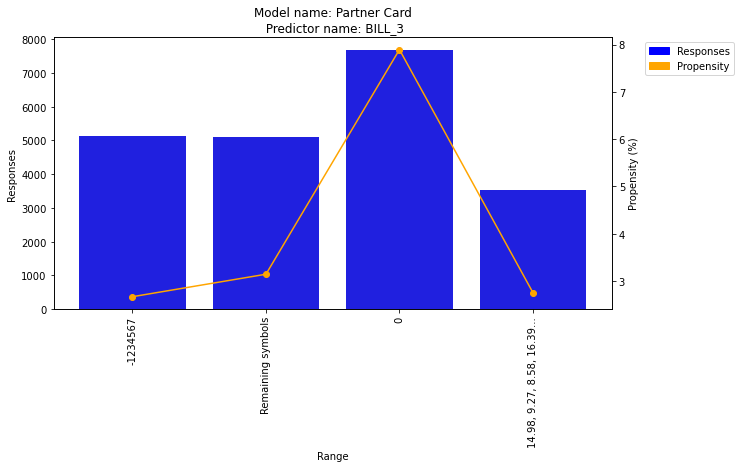

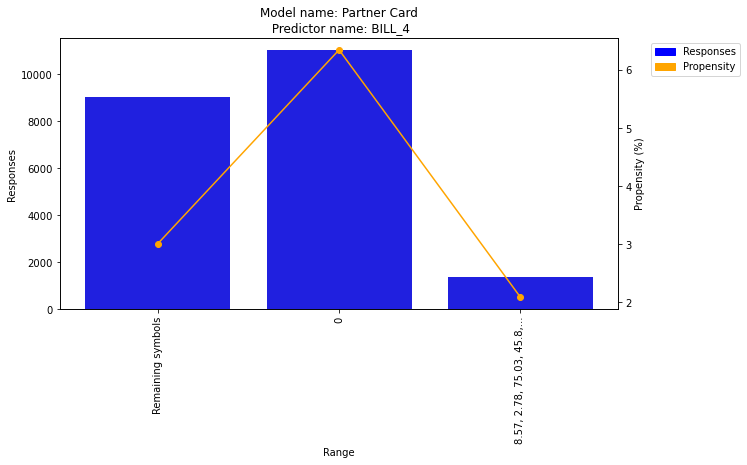

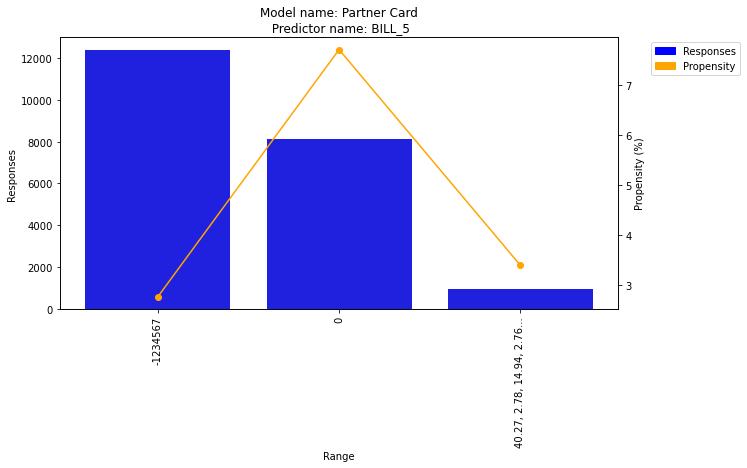

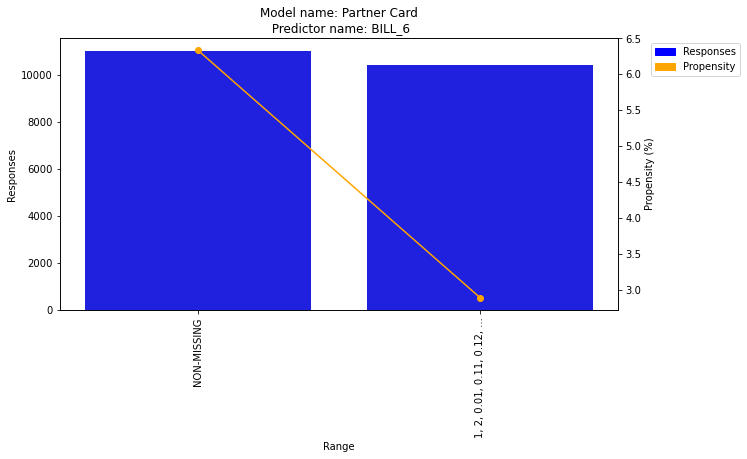

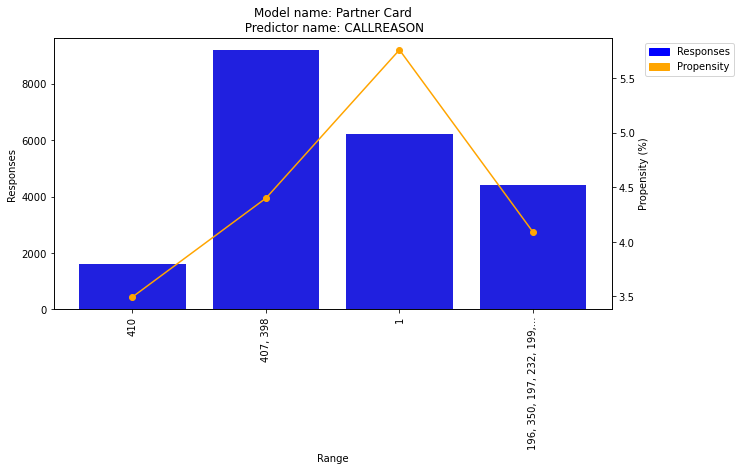

In [23]:
Preds.show_predictor_report(query={'model name':['Partner Card'], 'predictor name':['BILL',
       'BILL_1', 'BILL_2', 'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6',
       'CALLREASON']})

Show a boxplot of predictor performance accross all models in Tablets group

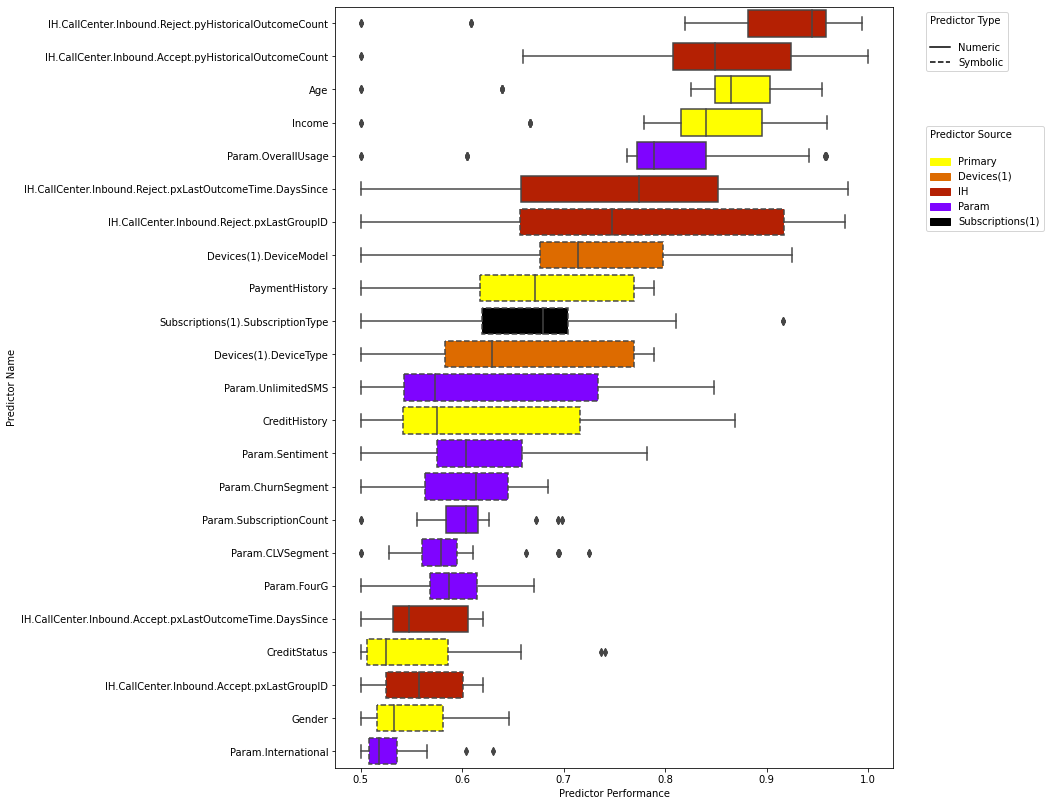

In [24]:
Preds.show_predictor_performance_boxplot(query={'group':['Tablets']}, figsize=(10, 14))

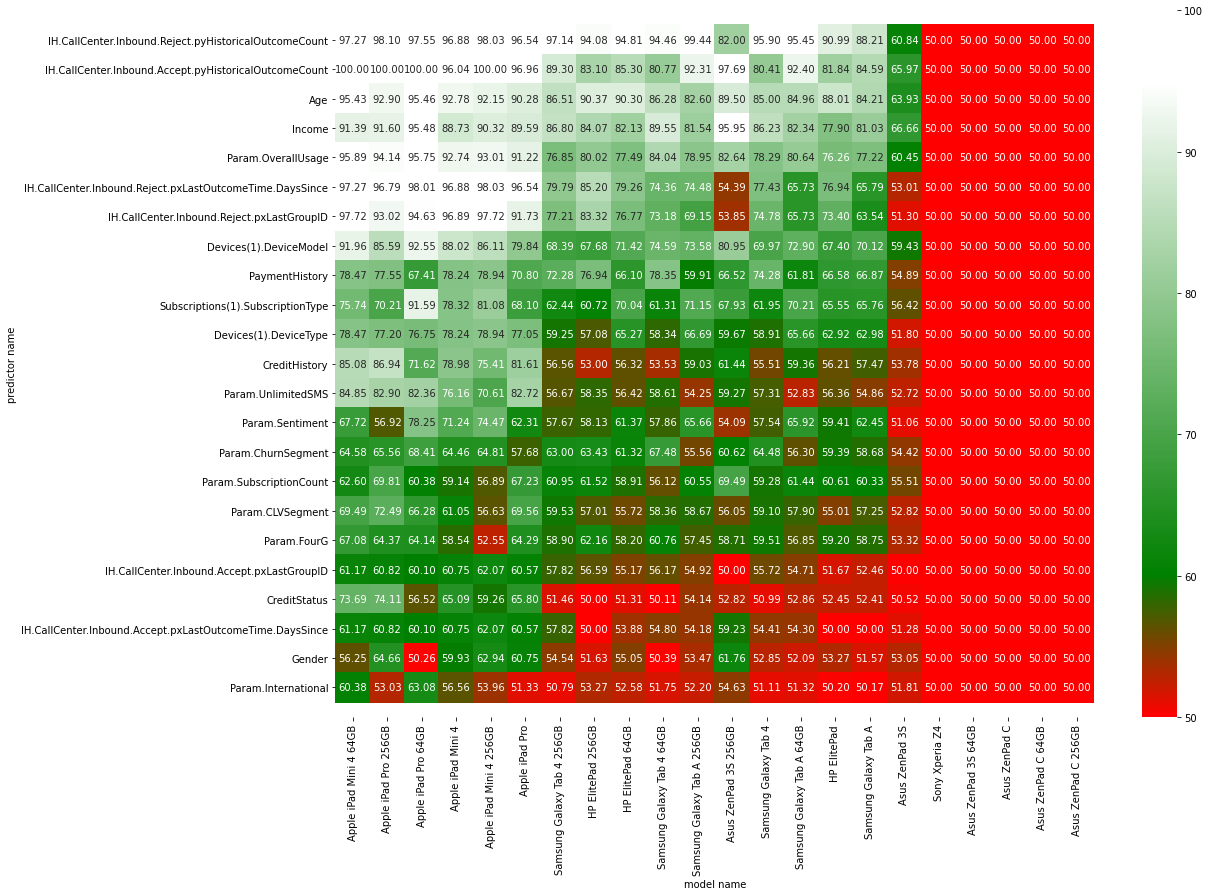

In [25]:
Preds.show_model_predictor_performance_heatmap(query={'group':['Tablets']}, figsize=(17, 13))